# SVM solution to NLI problem - Category A

1. Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

2. Data laoding and Pre-processing

In [ ]:
# Load the datasets
train_data = pd.read_csv('train.csv')
dev_data = pd.read_csv('dev.csv')

In [ ]:
# Fill NaN values in 'premise' and 'hypothesis' columns to ensure the text processing does not error out
train_data.fillna('', inplace=True)
dev_data.fillna('', inplace=True)

# Combine 'premise' and 'hypothesis' into a single text column and clean the text
train_data['text'] = train_data['premise'].str.cat(train_data['hypothesis'], sep=' ').str.replace('[^\w\s]', '').str.lower()
dev_data['text'] = dev_data['premise'].str.cat(dev_data['hypothesis'], sep=' ').str.replace('[^\w\s]', '').str.lower()

In [ ]:
# Initialize and apply the TF-IDF Vectorizer to transform text data into a format suitable for SVM training
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_data['text'])
X_dev = tfidf_vectorizer.transform(dev_data['text'])

3. Initialize and train SVM model

In [ ]:
# Initialize the SVM model with a linear kernel
svm_model = SVC(kernel='linear')

In [ ]:
# Train the SVM model on the training data
svm_model.fit(X_train, train_data['label'])

SVC(kernel='linear')

4. Evaluate on Development Data

In [ ]:
# Predict labels for the development dataset
y_dev_pred = svm_model.predict(X_dev)

In [ ]:
# Print the classification report to evaluate the model's performance
print("\nClassification Report:")
print(classification_report(dev_data['label'], y_dev_pred))

# Calculate and display the accuracy of the model
accuracy = (y_dev_pred == dev_data['label']).mean()
print(f"Accuracy: {accuracy}")


Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.51      0.54      3259
           1       0.58      0.64      0.61      3478

    accuracy                           0.58      6737
   macro avg       0.57      0.57      0.57      6737
weighted avg       0.58      0.58      0.57      6737

Accuracy: 0.5757755677601306


5. Plot Confusion Matrix

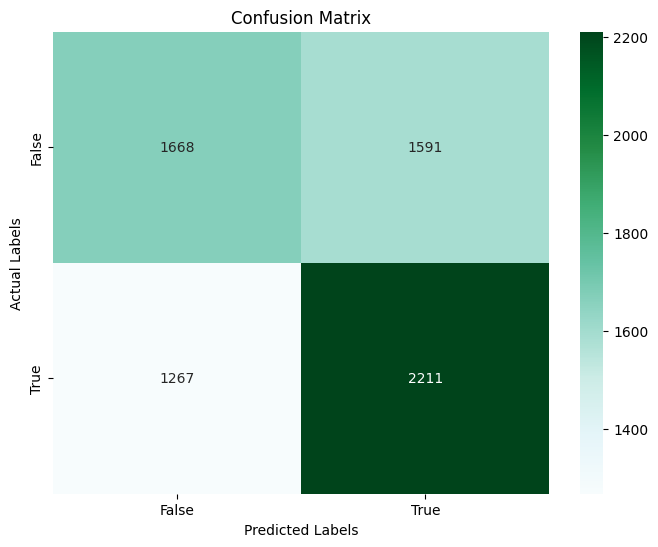

In [ ]:
# Generate the confusion matrix for a detailed performance analysis
cm = confusion_matrix(dev_data['label'], y_dev_pred)
# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='BuGn', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

6. Save Predictions to CSV

In [ ]:
# Save the predictions to a CSV file in the specified format
predictions_df = pd.DataFrame(y_dev_pred, columns=['prediction'])
predictions_df.to_csv('predictions.csv', index=False)  # Save directly in the session, click on the left-hand side file icon in Google Colab to see the file and downlaod, select refresh by right clicking the files field if file did not appear immedietly
print("Predictions saved to 'predictions.csv' in the current session.")

Predictions saved to 'predictions.csv' in the current session.


7. Save Model and vectorizer in order to be used in Demo-code Notebook

In [ ]:
# Save the model and vectorizer directly to the session, click on the left-hand side file icon in Google Colab to see the file and downlaod if needed , select refresh by right clicking the files field if file did not appear immedietly
joblib.dump(svm_model, 'svm_model.joblib')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')
print("Model and vectorizer saved in the current session.")

Model and vectorizer saved in the current session.
